# 0. Project introduction

<blockquote> 

In this project we will analyze how the investment in R&D (Research and Development) by private business has an impact on GDP (Gross Domestic Product) of the Organisation for Economic Co-operation and Development (OECD) countries. We will get data from the World Bank and OECD Databases.<br>

We will visualize how private business investment in R&D has changed before (2005-2006), during (2007-2008), after (2009-2010) and 5 years after (2015) the economic crisis of 2007-2008.<br>

Special attention will be paid on the periods before, during and after the economic crisis. We are specially interested to see if the investment made by private business in R&D in the previous years of the economic crisis (2005-2006) have a positive impact on the countries GDP during the economic crisis (2007-2008) or after (2009-2010). In this case, we will expect that the higher the investment of private business in the previous years of the economic crisis, the lesser the impact on the GDP. <br>

1. We will import the files, keep the relevant columns and clean the data.
2. Normality assumptions will be tested based on graphs and statistical significance.
3. In case of non-normal distribution of the data, we will apply the appropriate data transformation for statistical analyses.
4. Correlation analysis will show us the associations between private business investment in R&D and countries GDP.
5. Regression analysis will allow us to see if the country GDP could be predicted by private business investment in R&D.

</blockquote>

# 1. Set up

## 1.1. Environment

<blockquote> 

We will import basic packages to manage data, as well as to perform statistical analyses and to visualize data <br> <b>Statistical packages:</b> Numpy, ScipyStats, Pinguoin and StatsModels <br> <b>Visualization packages:</b> Matplotlib, Seaborn and Missingno to visualize missing values

</blockquote>

In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

C:\Users\sebas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\sebas\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.5, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## 1.2. Load data from previous notebook 

In [3]:
%store -r GDP_OECD
%store -r GERD_OECD
%store -r GDP_OECD_periods
%store -r GERD_OECD_periods
%store -r GERD_OECD_financed
%store -r GERD_OECD_performed

# 2. Explore and visualize data

## 2.1. Visualization of raw data
### 2.1.1. Mean (2005-2015)

<blockquote>

Let's visualize the mean of the GERD data financed and performed by business enterprise for all the years. We will order the data from highest to lowest. As we still have the GERD_OECD_financed and performed dataframes, we will use them to plot the data to avoid to drop NaN values.<br>

**Summary:** we can see that Japan, Korea, Germany, Switzerland and Finland are five countries with a higher percentage of GERD financed by business enterprise. Among the five countries with a lowest percentage are Greece, Latvia, Mexico, Lithuania and Colombia. However, if we take a look to the GERD performed by business enterprise as a percentage of GDP, we can see that other country well known for their high investment in R&D appear among the top five: Israel, Korea, Japan, Finland and Switzerland. It is interesting the case of Israel, a country that invest a high percentage of the GDP in R&D. In this case, if we consider the GERD financed by business Israel falls behind Portugal, however, in the GERD performed by business is at the top of the OCDE. Korea, Kapan, Finland and Switzerland still remain in high positions in both cases.
    
</blockquote>

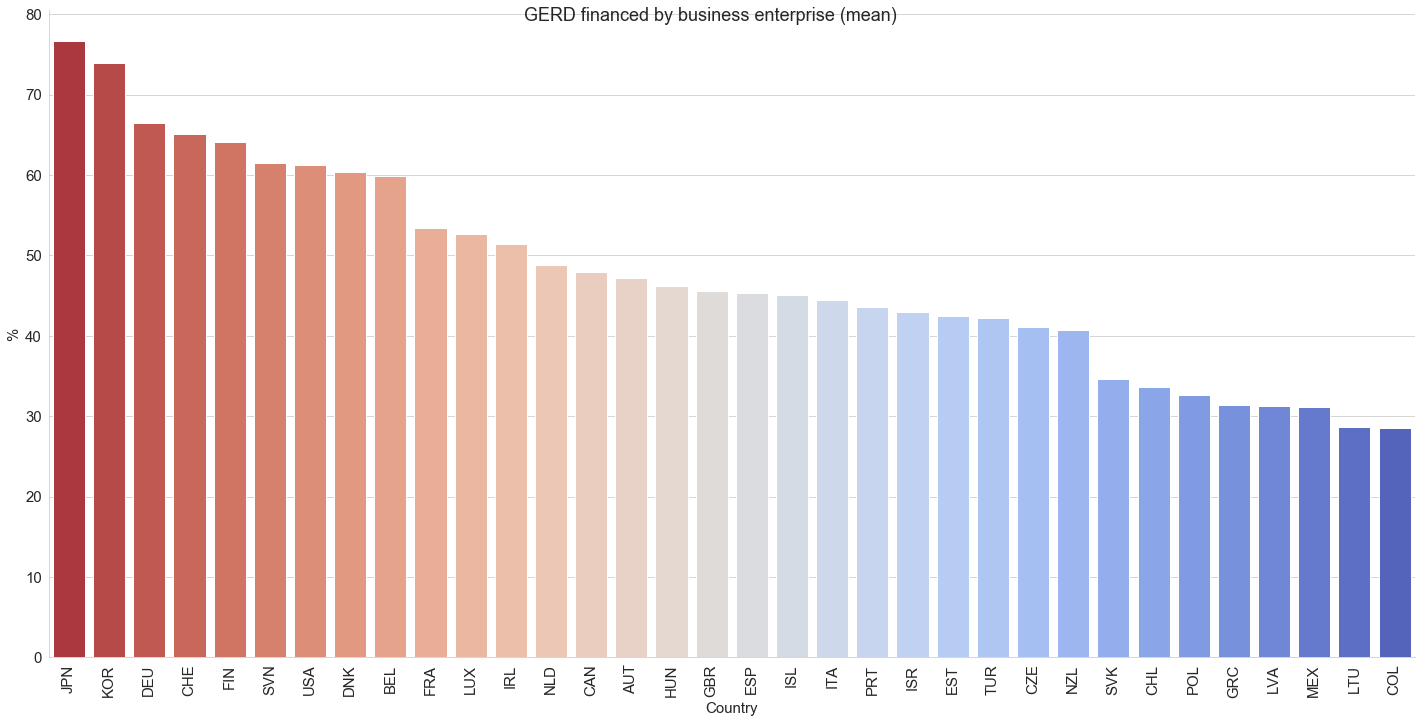

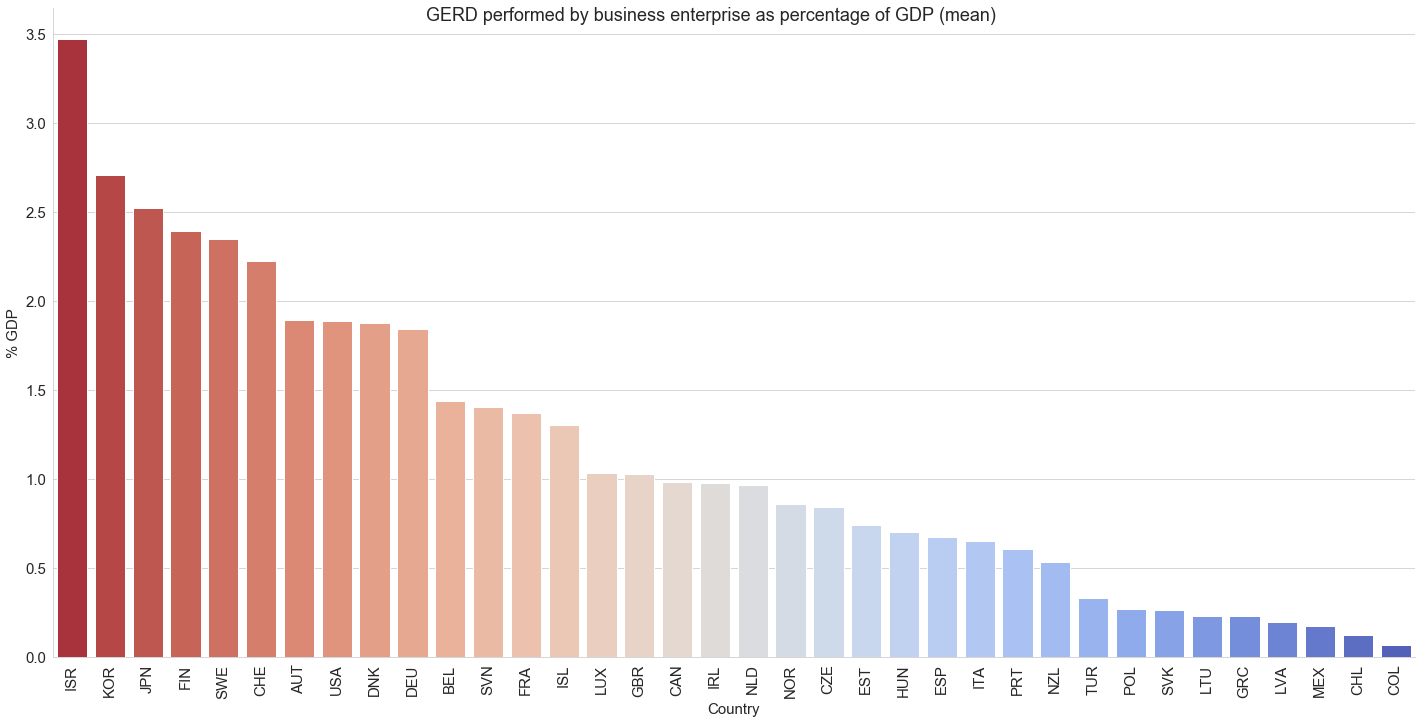

In [4]:
sns.set_style('whitegrid') #set seaborn style
plt.rc('legend',fontsize = 15) # set legend size at the beginning of the code for all plots
plt.rc('xtick', labelsize = 15) # set xtick customization
plt.rc('ytick', labelsize = 15) #set ytick customization
plt.rc('font', size = 15) # set fontype used in xlabel, ylabel and title

def barplot_coolwarm(x, y, data, xlabel, ylabel, title):
    
    """
    Plot barplots from given variables and dataframe
    
    Input:
    x: column name of the variable in the x axis, as string
    y: column name of the variable in the y axis, as string
    data: dataframe
    xlabel: name of the label of the x axis, as string
    ylabel: name of the label of the y axis, as string
    title: title of the plot, as string
    
    Output:
    Barplot
    """
    
    g = sns.catplot(x = x, y = y, data = data, kind = 'bar', height = 10, aspect = 2, palette = 'coolwarm_r')
    g.fig.suptitle(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 90)
    plt.yticks()

    ax = g.ax #annotate axis = seaborn axis
    
    #def annotateBars(row, ax = ax):
    #    ax.axhline(y = annotate_bar, label = "mean OECD countries", linestyle = "--")
    #    for p in ax.patches:
    #         ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    #             ha = "center", va = "center", fontsize = 12, color = "grey", rotation = 0, xytext = (0, 20),
    #             textcoords = "offset points")

    #plot = data.apply(annotateBars, ax = ax, axis = 1)

    plt.show()


barplot_coolwarm('LOCATION', 'GERD_financed_business_perc',  
                 GERD_OECD_financed.groupby(['LOCATION'])['GERD_financed_business_perc'].apply(np.mean).sort_values(ascending = False).reset_index(drop = False), 
                 'Country', '%', 'GERD financed by business enterprise (mean)')

barplot_coolwarm('LOCATION', 'GERD_performed_business_perc_GDP',  
                 GERD_OECD_performed.groupby(['LOCATION'])['GERD_performed_business_perc_GDP'].apply(np.mean).sort_values(ascending = False).reset_index(drop = False), 
                 'Country', '% GDP', 'GERD performed by business enterprise as percentage of GDP (mean)')

### 2.1.2. Data from 2015

<blockquote>
    
Let's do the same but just for the year 2015, as it is the more recent record for which we are going to explore the data.

**Summary:** the picture doesn't change much if we just take a look to the 2015 data. Still countries as Japan, Korea, 
Germany and Switzerland remain in high position in the GERD financed by business enterprise. Surprinsingly, Slovenia appears in the top third position of the list, and Finland is relegated to a ninth position. Also, Israel falls among the countries with the lowers GERD financed by business enterprise with Lithuania, Slovakia, Latvia and Mexico.

Considering the GERD performed by business enterprise as a percentage of GDP, Israel is at the top of the list, followed by Korea, Japan, Switzerland, Sweden and Austria. The same pattern for Israel is found in the 2015 data. At the tail of GERD performed by business enterprise we can find again Lithuania, Mexico, Latvia, Colombia, and also Chile.

</blockquote>

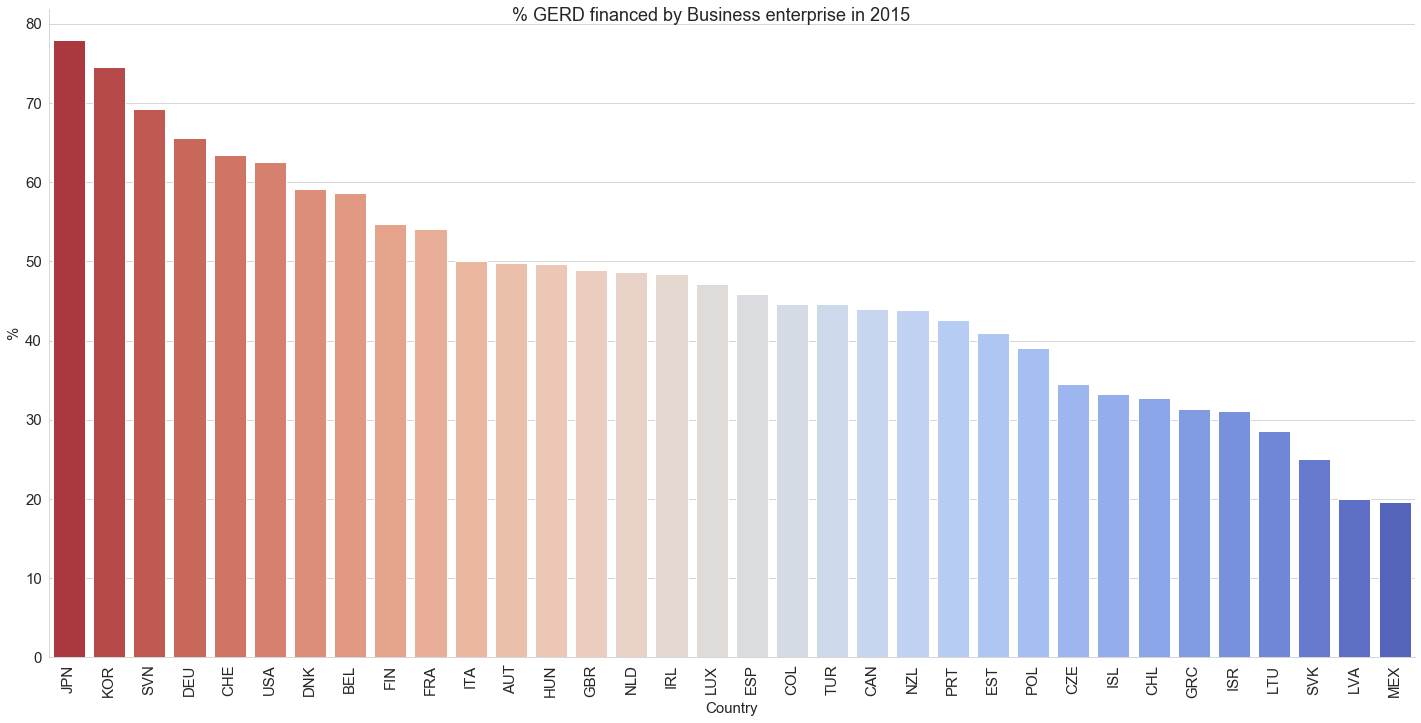

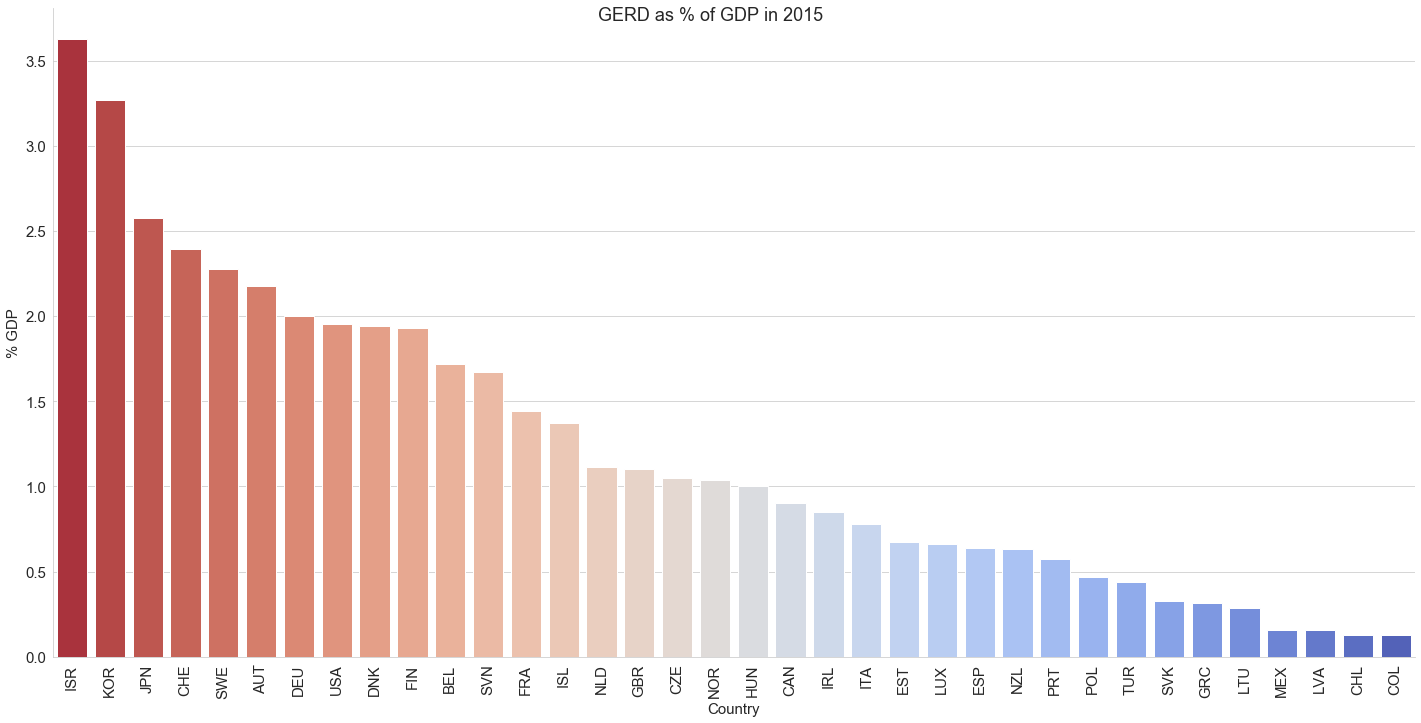

In [27]:
barplot_coolwarm('LOCATION', 'GERD_financed_business_perc',  
                 GERD_OECD_financed.loc['2015-01-01'].sort_values(by = ['GERD_financed_business_perc'], ascending = False), 
                 'Country', '%', '% GERD financed by Business enterprise in 2015')

barplot_coolwarm('LOCATION', 'GERD_performed_business_perc_GDP',  
                 GERD_OECD_performed.loc['2015-01-01'].sort_values(by = ['GERD_performed_business_perc_GDP'], ascending = False), 
                 'Country', '% GDP', 'GERD as % of GDP in 2015')

### 2.1.3. Descriptive statistics from time periods

<blockquote>
    
Descriptives plots of data before, during, after, and 5 years after economic crisis of GERD financed and performed by business enterprise.

**Summary:** in these plots we can first notice that Switzerland lacks of period before and after the economic crisis. This is not going to be a problem in the statistical analysis, as cases with NaN values will be excluded from analysis.<br>

From the plot of GERD financed by business enterprise that there are a few countries that have slightly increased their percentage in the years after the economic crisis (Denmark, Estonia, France, Greece, Hungary, Italy, Lithuania and Portugal) compared to the period before the economic crisis. If we look 5 years after the crisis, we find that countries as Colombia, Great Britain, Hungary, Italy, Lithuania, New Zealand, Polonia and Slovenia have increased their percentage compared to the period before the economic crisis.

Canada, Czech Republic, Finland, Luxembourg, Latvia, Mexico and Slovakia show a decrease over the periods in the GERD financed by business enterprise, with levels in 2015 under the levels of the period before the economic crisis. On the other hand, France, Hungary and Italy show an increase over the periods.

Concerning the GERD performed by business enterprise, Austria, Belgium, Germany, Denmark, Greece, Hungary, Italy, Korea, New Zealand, Slovenia and Turkey show increases over the time periods. However, Canada and Luxembourg show decreases. Countries as Spain, Iceland, Israel, Japan, Latvia and Mexico tend to be quite estable among the periods.

</blockquote>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

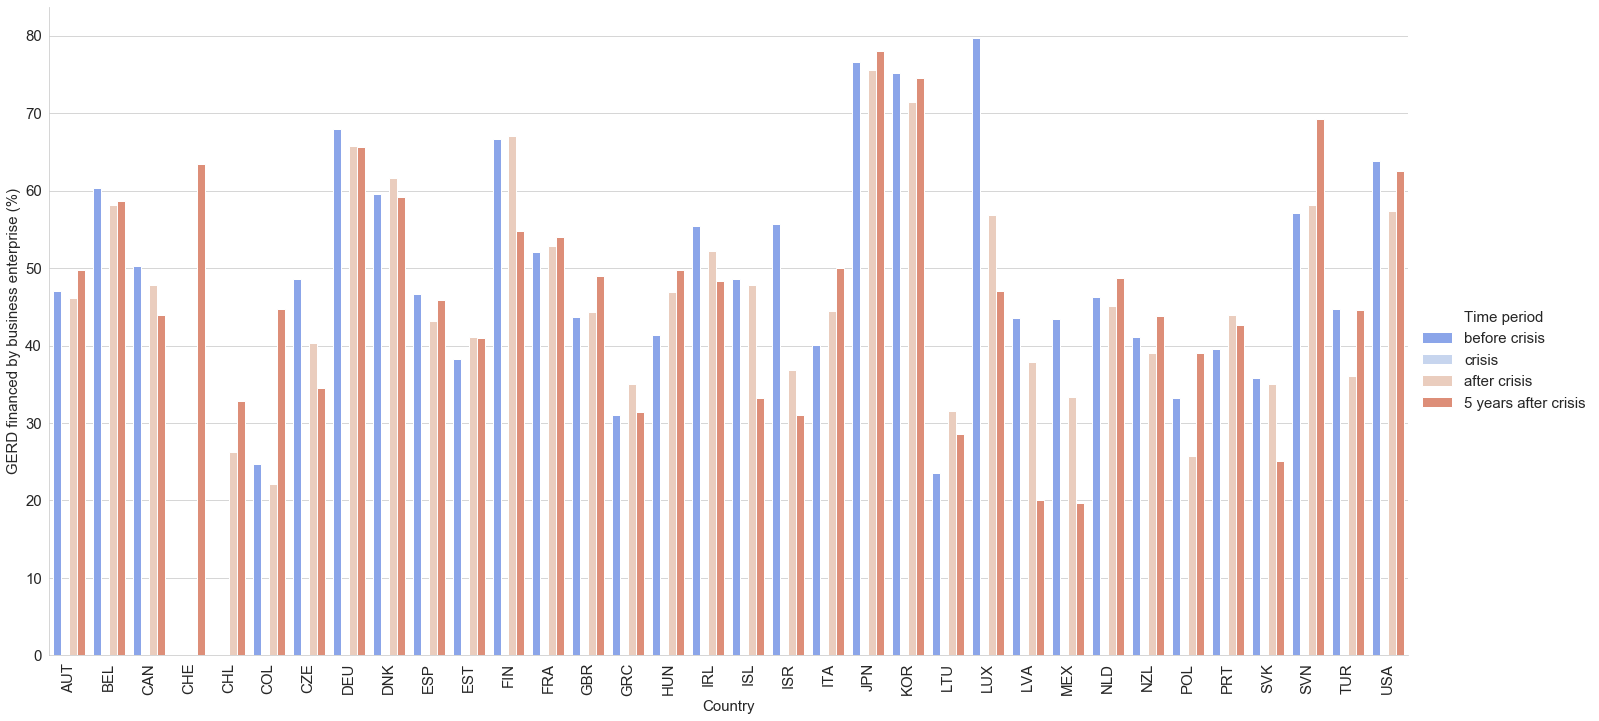

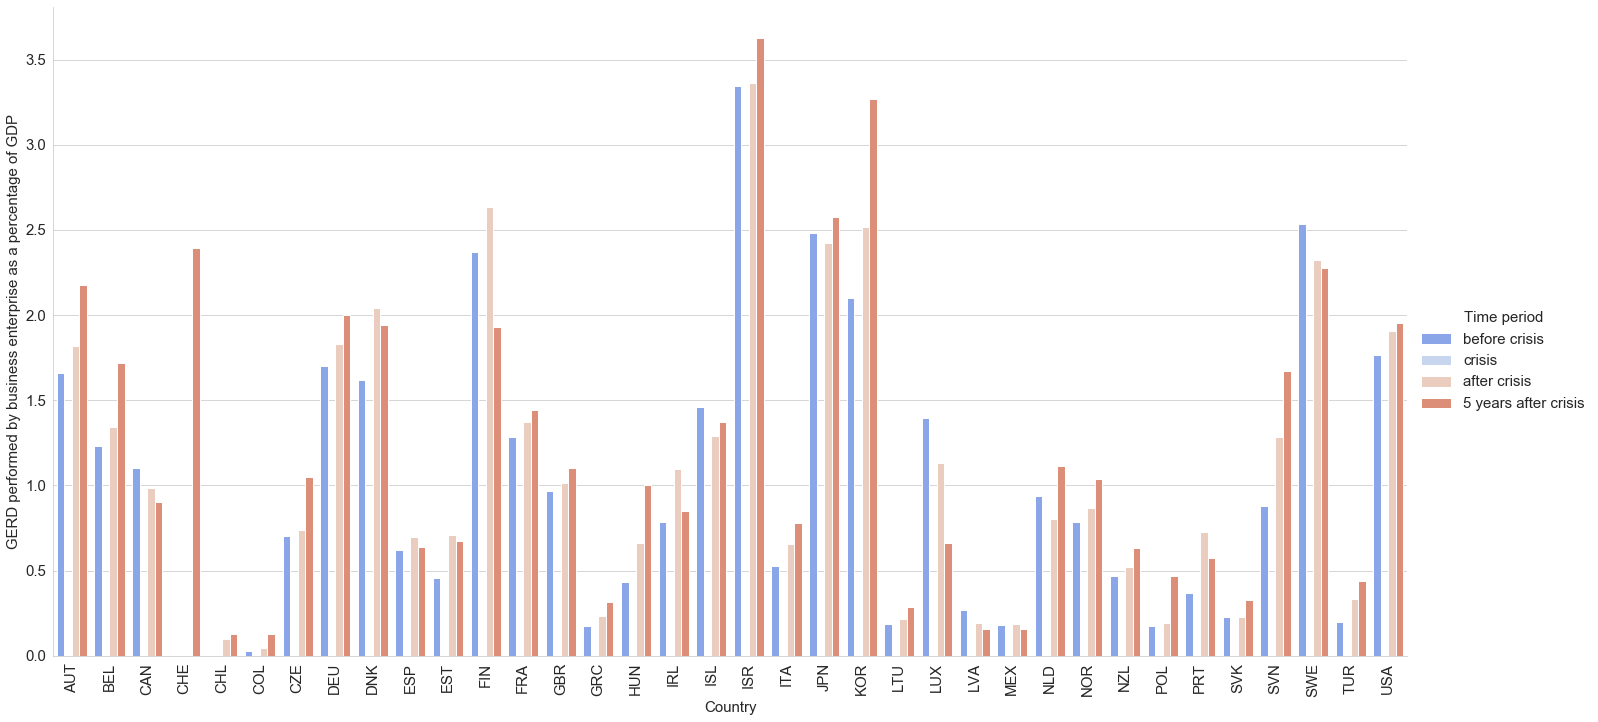

In [28]:
g = sns.catplot(x = 'LOCATION', y = 'GERD_financed_business_perc', hue = 'Time period', hue_order = ['before crisis', 'crisis', 'after crisis', '5 years after crisis'], 
                data = GERD_OECD_financed_periods, 
                kind = 'bar', height = 10, aspect = 2, palette = 'coolwarm')
plt.xlabel('Country')
plt.ylabel('GERD financed by business enterprise (%)')
plt.xticks(rotation = 90)

g = sns.catplot(x = 'LOCATION', y = 'GERD_performed_business_perc_GDP', hue = 'Time period', hue_order = ['before crisis', 'crisis', 'after crisis', '5 years after crisis'], 
                data = GERD_OECD_performed_periods, kind = 'bar', height = 10, aspect = 2, palette = 'coolwarm')
plt.xlabel('Country')
plt.ylabel('GERD performed by business enterprise as a percentage of GDP')
plt.xticks(rotation = 90)